In [1]:
import sys
import stylishplot

sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

import emulatte as emu
from emulatte.source import *
from emulatte.halfspace import analytical

# VMD

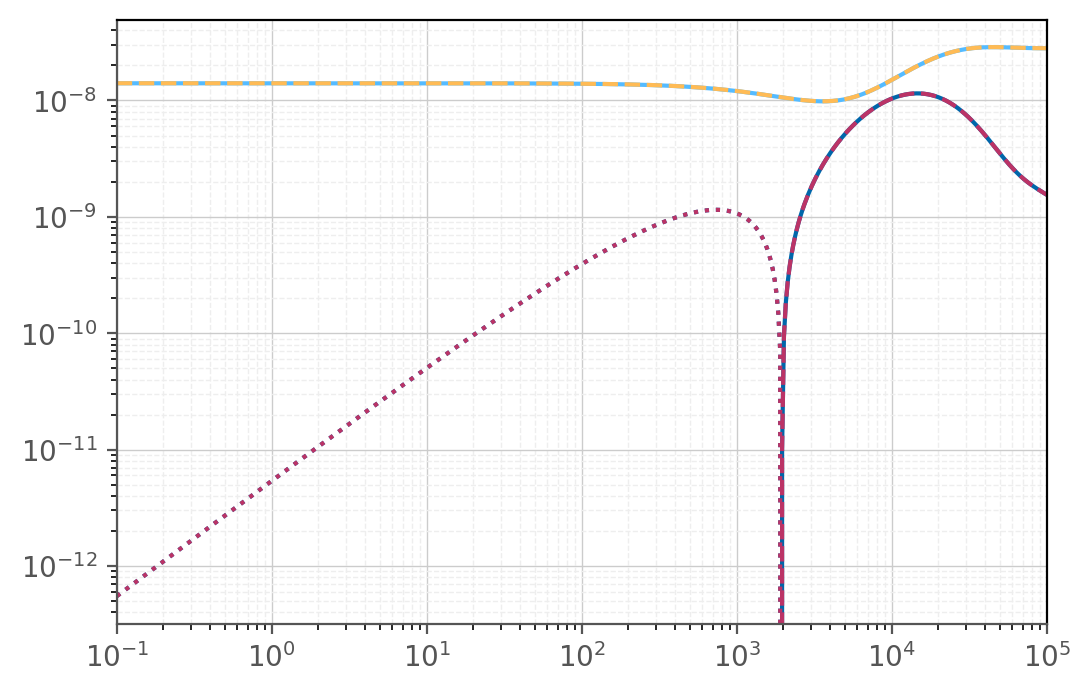

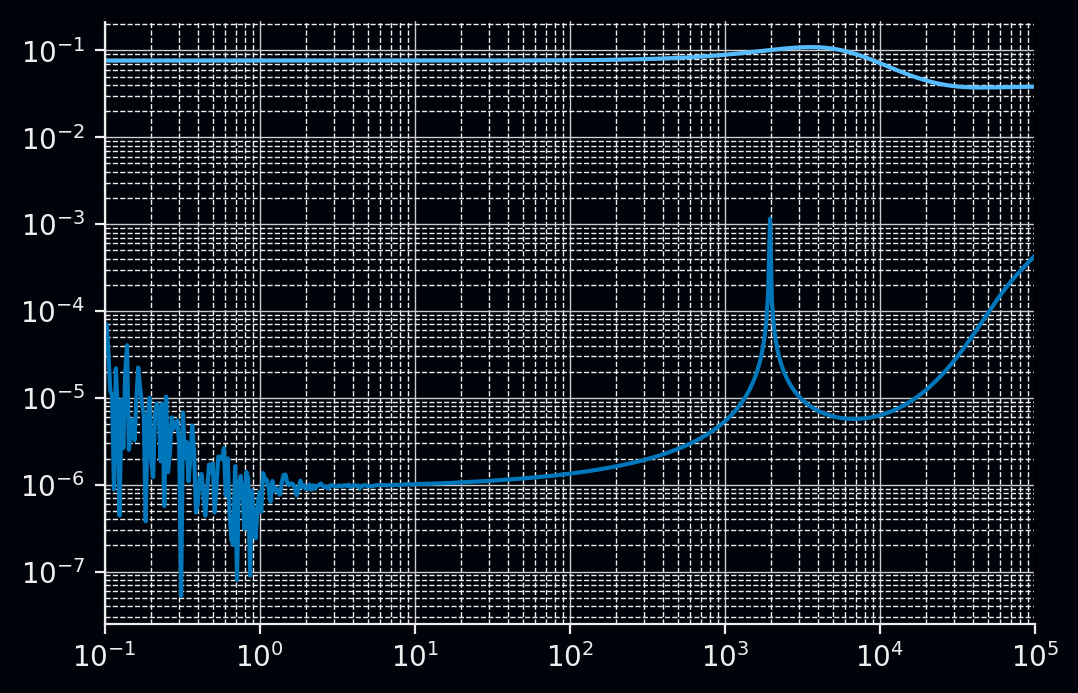

In [2]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = HMD(1, 0)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
#model.change_dlf_filter("werthmuller_201")
hz = model.fdem("H", "x", rec, freq)

hz_ideal = analytical.SurfaceHMDx(res[0], rec[:2]).fdem_hx(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()

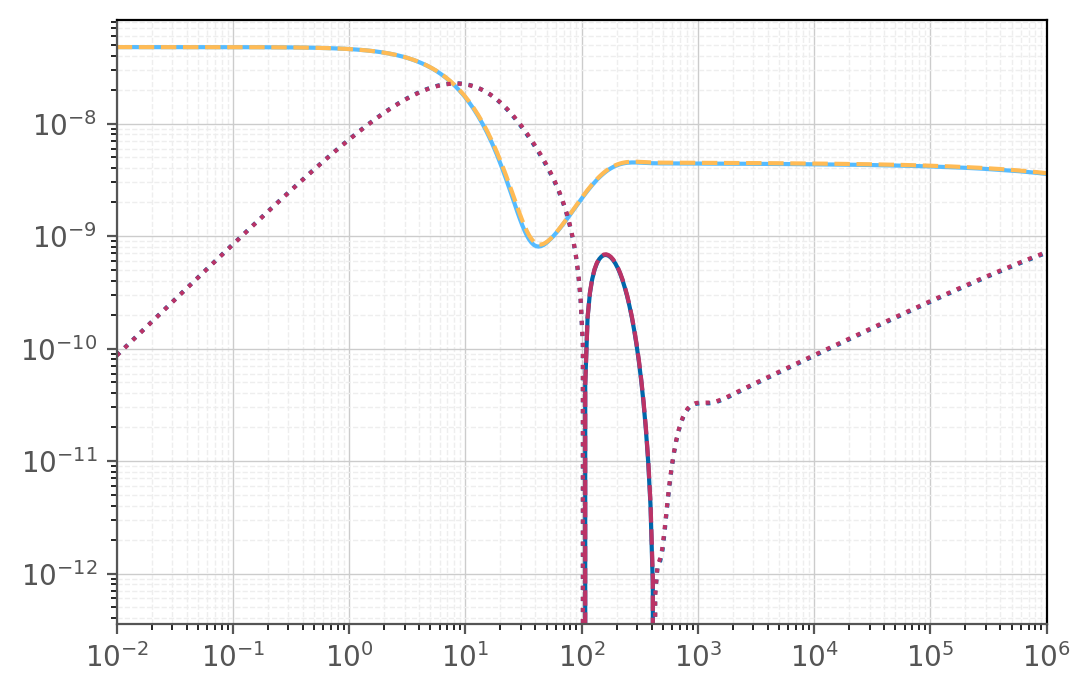

In [10]:
thick = [60, 60]
res = [1, 10, 100]
freq = np.logspace(-2,6,400)
length = 10 * 2 ** 0.5
sz = 0.1
rz = 0
src = [[-5, -5, sz], [5, 5, sz]]
rec = [500, 500, rz]
EH = "E"
xyz = "y"

s = GroundedWire(1, 100)
model = emu.create_model(thick)
model.set_params(res)
model.set_params_air(1e9, 1, 1)
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="werthmuller_201")
em_gw = model.fdem(EH, xyz, rec, freq)

s = HED(1, length, 45)
src = [0, 0, sz]
model = emu.create_model(thick)
model.set_params(res)
model.set_params_air(1e9, 1, 1)
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="werthmuller_201")
em_ed = model.fdem(EH, xyz, rec, freq)

fig = stylishplot.fdem_plot(freq, em_gw, em_ed)

In [4]:
start_time = time.perf_counter()
thick = [1000, 100]
res = [100, 1, 100]
freq = np.logspace(-2,5,400)
src = [[-500, 0, 0.01], [500, 0, 0.01]]
rec = [0, 1000, 0]
EH = "H"
xyz = "y"

vmd = GroundedWire(1, 1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
model.change_dlf_filter(hankel_dlf="anderson_801")
em_gw = model.fdem(EH, xyz, rec, freq)

end_time = time.perf_counter()
elapsed_time = end_time - start_time

NameError: name 'time' is not defined

In [ ]:
%%timeit
em_gw = model.fdem("H", "z", rec, freq)

603 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


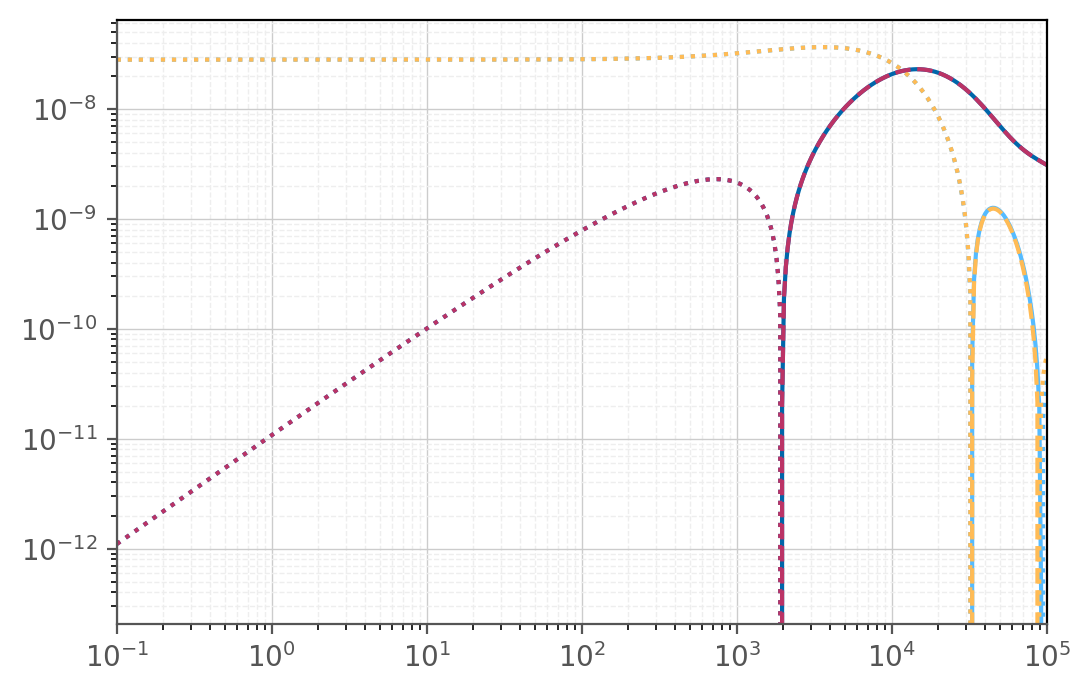

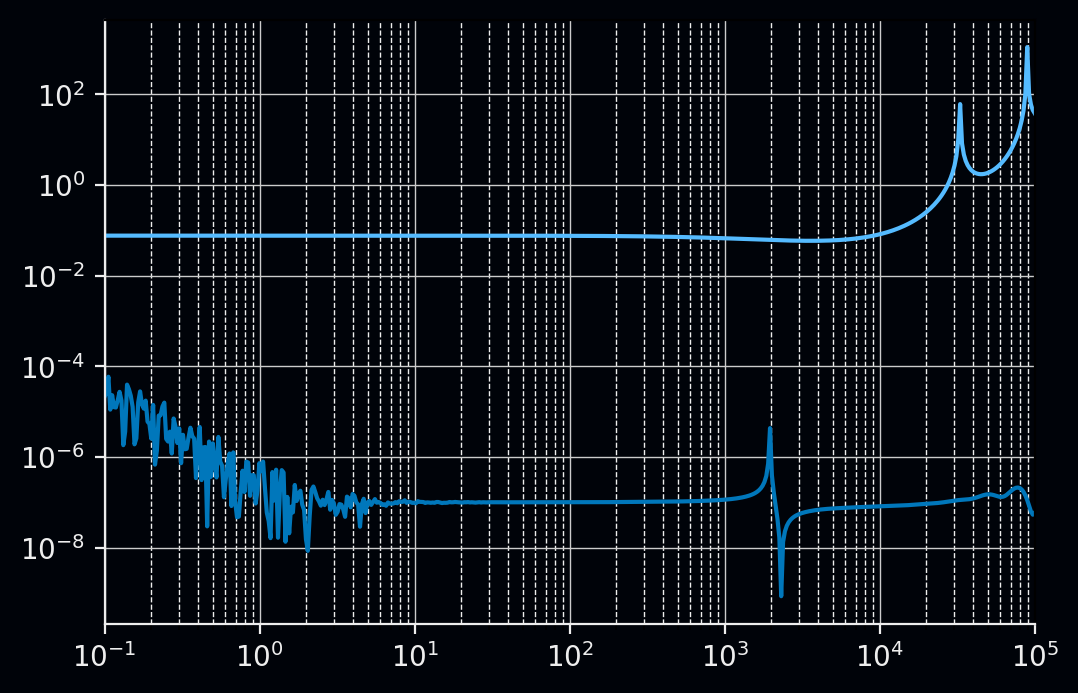

In [ ]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = VMD(1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
hz = model.fdem("H", "z", rec, freq)

hz_ideal = analytical.SurfaceVMD(res[0], rec[:2]).fdem_hz(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()


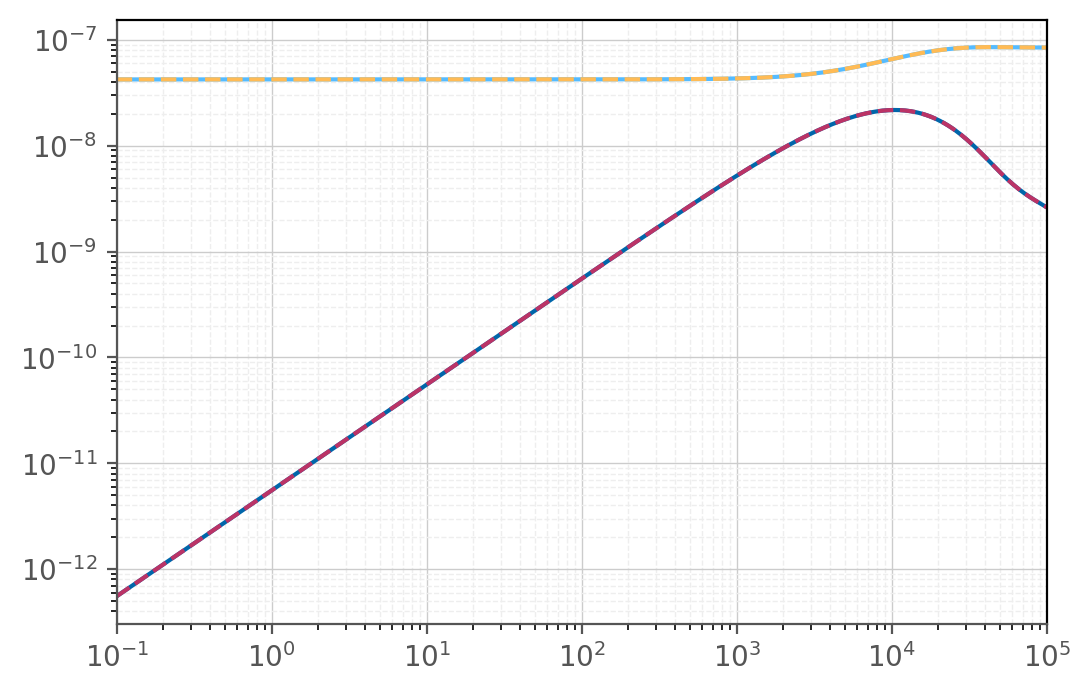

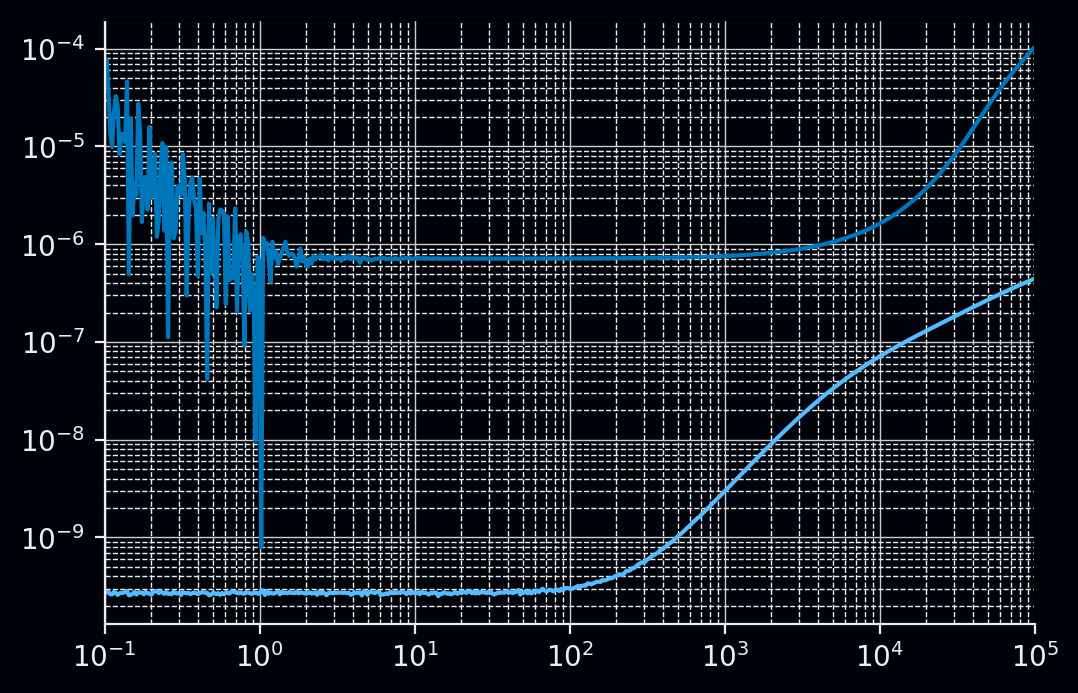

In [ ]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = HMD(1, 0)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
model.change_dlf_filter("werthmuller_201")
hz = model.fdem("H", "y", rec, freq)

hz_ideal = analytical.SurfaceHMDx(res[0], rec[:2]).fdem_hy(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()